#  Layer Explaination

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras import datasets


%matplotlib inline

In [2]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [3]:
image = train_x[0]

In [4]:
image.shape

(28, 28)

[batch_size, height, width, channel] 이렇게 이루어져 있으니까, 차원을 앞뒤로 하나씩 늘려주자, 지금 이미지의 차원은 [28,28] 임 

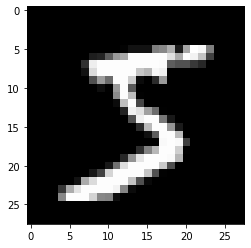

In [5]:
plt.imshow(image, 'gray')
plt.show()

In [6]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

In [7]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='SAME', activation='relu')

In [8]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [9]:
layer = tf.keras.layers.Conv2D(3, 3, 1, padding='SAME')
layer

In [10]:
output = layer(image)
output

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype

In [11]:
import numpy as np



In [12]:
np.min(image), np.max(image)

(0.0, 255.0)

In [13]:
np.min(output), np.max(output)

(-154.55945, 211.6401)

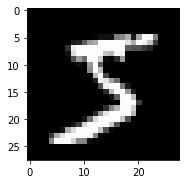

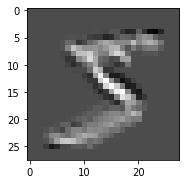

In [14]:
plt.subplot(1,2,1)
plt.imshow(image[0, :, :, 0], 'gray')
plt.show()
plt.subplot(1,2,2)
plt.imshow(output[0, :, :, 0], 'gray')
plt.show()

###  weight 불러오기 ! 

- layer.get_weights()

In [15]:
weight = layer.get_weights()
weight

[array([[[[ 0.3041129 ,  0.0908131 ,  0.13275868]],
 
         [[-0.19533996, -0.15456977, -0.06115183]],
 
         [[-0.13717219, -0.16701509,  0.17575061]]],
 
 
        [[[ 0.17786211,  0.37082618, -0.15570438]],
 
         [[ 0.38991606,  0.40613896,  0.28139108]],
 
         [[ 0.09240204, -0.3457086 , -0.11919636]]],
 
 
        [[[-0.3598371 , -0.22272272, -0.05159909]],
 
         [[-0.00595975,  0.26634365,  0.313532  ]],
 
         [[ 0.13268888, -0.13144332, -0.2817951 ]]]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [16]:
weight[0].shape, weight[1].shape # 첫번째 인덱스가 weight, 두번째 인덱스값이 바이어스! 

((3, 3, 1, 3), (3,))

<function matplotlib.pyplot.show(close=None, block=None)>

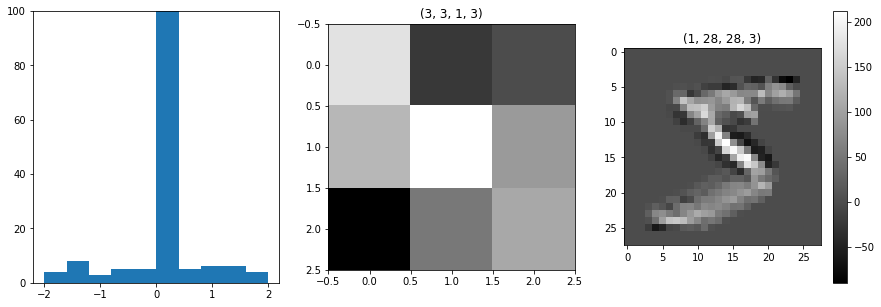

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

plt.subplot(1, 3, 2)
plt.title(weight[0].shape)
plt.imshow(weight[0][:, :, 0, 0], 'gray')

plt.subplot(1, 3, 3)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show

###  ReLU 함수 사용 하기 ! 

In [18]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [19]:
act_output 

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype

In [20]:
np.min(act_output),np.max(act_output) # 렐루 함수 거쳐서 0 이하는 전부 0 으로 리턴 

(0.0, 211.6401)

<function matplotlib.pyplot.show(close=None, block=None)>

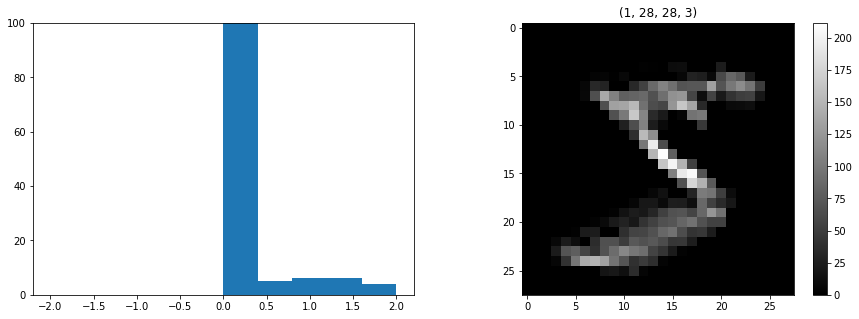

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.hist(act_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

plt.subplot(1,2 , 2)
plt.title(act_output.shape)
plt.imshow(act_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show

##  Pooling ! 
 마치 압축과도 같다고 생각을 하면 됨 ! 이번엔 맥스풀링을 해보기! 

In [22]:
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')

In [23]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')
pool_output = pool_layer(act_output)

In [24]:
act_output.shape 

TensorShape([1, 28, 28, 3])

In [25]:
pool_output.shape # 이렇게 반으로 줄어듬! 

TensorShape([1, 14, 14, 3])

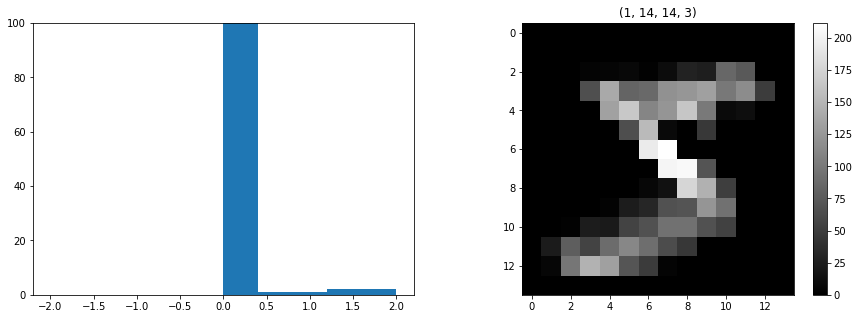

In [26]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.hist(pool_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

plt.subplot(1, 2, 2)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

# Flatten 

In [27]:
import tensorflow as tf

In [28]:
tf.keras.layers.Flatten()

In [29]:
layer = tf.keras.layers.Flatten()

In [30]:
flatten = layer(output)

In [31]:
output.shape

TensorShape([1, 28, 28, 3])

In [32]:
flatten.shape # 이렇게 쭉 펼쳐짐!  -> 28 * 28 * 3

TensorShape([1, 2352])

In [33]:
28 * 28 * 3

2352

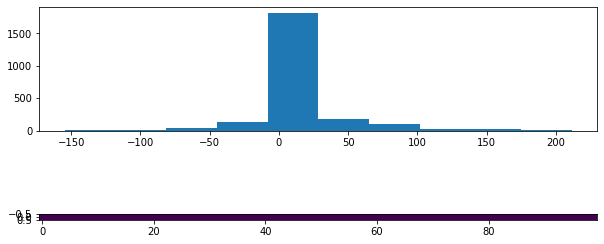

In [34]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.hist(flatten.numpy().ravel())
plt.subplot(2, 1, 2)
plt.imshow(flatten[:, :100])
plt.show()

#  Dense

In [36]:
tf.keras.layers.Dense(32, activation='relu')

In [37]:
layer = tf.keras.layers.Dense(32, activation='relu')    

In [38]:
output = layer(flatten)

In [39]:
output.shape

TensorShape([1, 32])

# DropOut 

In [40]:
layer = tf.keras.layers.Dropout(0.7) # 비율을 주는거임! 학습할때, 그렇기때문에 실제 노드 수가 변경된다거나 하는건 아님 
output = layer(output)

In [41]:
output.shape

TensorShape([1, 32])

# Build Model

In [42]:
from tensorflow.keras import layers

In [45]:
input_shape = (28, 28, 1)
num_classes = 10

In [46]:
inputs = layers.Input(shape=input_shape)

# Feature Extraction 
net = layers.Conv2D(32, 3, padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2, 2))(net)
net = layers.Dropout(0.25)(net)


# Fully connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(num_classes)(net) # Mnist 가 가진게 총 0~9 까지 10 개고, 그렇기때문에 마지막에 내보내는 노드 갯수도 최종적으로 총 10 개여야함
net = layers.Activation('softmax')(net)


model = tf.keras.Model(inputs=inputs, outputs=net, name='basic')






In [47]:
model

In [49]:
model.summary()

Model: "basic"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0     